In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df=pd.read_csv(c")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


# EDA

In [80]:
df.shape

(489, 4)

In [81]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.3 KB


In [83]:
df.drop_duplicates
df.shape

(489, 4)

In [84]:
df.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


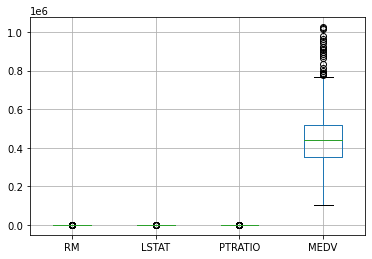

In [85]:
df.boxplot()

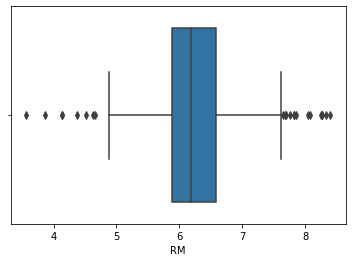

In [86]:
sns.boxplot(x="RM",data=df)

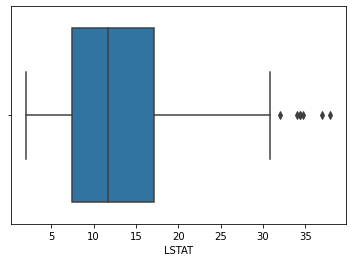

In [87]:
sns.boxplot(x="LSTAT",data=df)

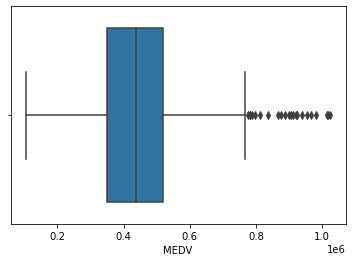

In [88]:
sns.boxplot(x="MEDV",data=df)

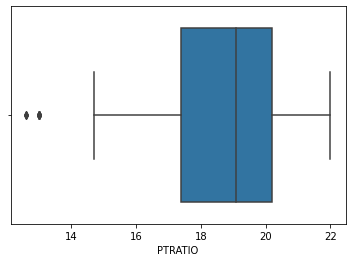

In [89]:
sns.boxplot(x="PTRATIO",data=df)

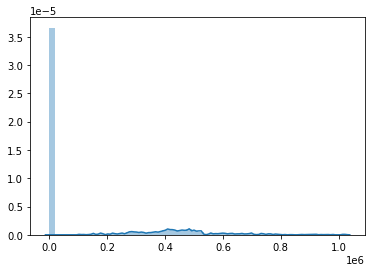

In [90]:
sns.distplot(df)

# Outlier Detection

In [91]:
## Outlier analysis
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

RM              0.695
LSTAT           9.750
PTRATIO         2.800
MEDV       168000.000
dtype: float64

In [92]:
#o_df=df[~((df<(Q1-1.5*IQR)) | (df> (Q3+1.5*IQR))).any(axis=1)]
#o_df.shape

In [93]:
new_df=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
new_df


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


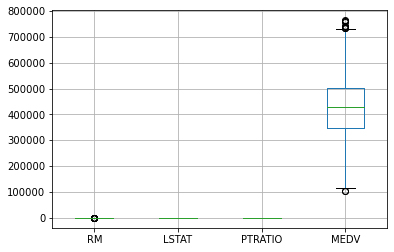

In [94]:
new_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x102B7748>,
      dtype=object)

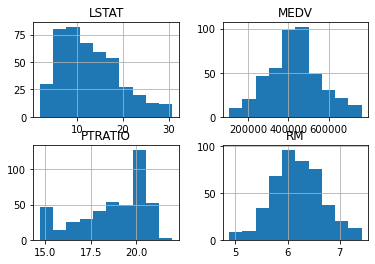

In [95]:
new_df.hist()

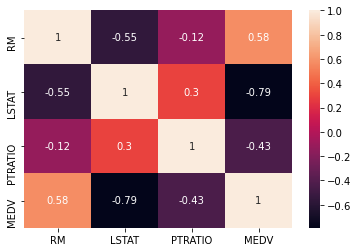

In [96]:
sns.heatmap(new_df.corr(),annot=True)

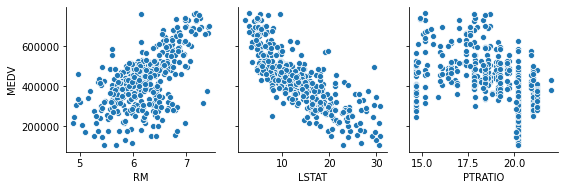

In [97]:
sns.pairplot(x_vars=["RM","LSTAT","PTRATIO"],y_vars=["MEDV"],data=new_df)

# Model building

In [98]:
y=new_df["MEDV"]

In [107]:
x=new_df.drop("MEDV",axis=1)
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


# Model Spliting

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=101)

# Model Fitting

In [113]:
from sklearn.linear_model import LinearRegression

In [115]:
model=LinearRegression()

In [116]:
model.fit(xtrain,ytrain)

LinearRegression()

In [119]:
ypred=model.predict(xtest)

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Model evaluation

In [128]:
mae=mean_absolute_error(ytest,ypred)
print("mean_absolute_error:-",mae)
mse=mean_squared_error(ytest,ypred)
print("mean_squared_error:-",mse)
r2=r2_score(ytest,ypred)
print("r2_score:-",r2)
rmse=np.sqrt(mse)
print("Root mean squared error:-",rmse)

mean_absolute_error:- 55143.591272247075
mean_squared_error:- 4737478600.032286
r2_score:- 0.6883132514831242
Root mean squared error:- 68829.34403313957


# Standardise Dataset

In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(xtrain)
sc_xtrain=sc.transform(xtrain)
sc_xtest=sc.transform(xtest)

In [130]:
model=LinearRegression()

In [131]:
model.fit(sc_xtrain,ytrain)

LinearRegression()

In [133]:
sc_ypred=model.predict(sc_xtest)

In [134]:
mae=mean_absolute_error(ytest,sc_ypred)
print("mean_absolute_error:-",mae)
mse=mean_squared_error(ytest,sc_ypred)
print("mean_squared_error:-",mse)
r2=r2_score(ytest,sc_ypred)
print("r2_score:-",r2)
rmse=np.sqrt(mse)
print("Root mean squared error:-",rmse)

mean_absolute_error:- 55143.59127224705
mean_squared_error:- 4737478600.032284
r2_score:- 0.6883132514831243
Root mean squared error:- 68829.34403313955
